In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input,Embedding
from tensorflow.keras.layers import Conv1D,Conv2D, GlobalAveragePooling1D, MaxPooling1D

from tensorflow.keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.utils import to_categorical

In [2]:
# fix random seed for reproducibility
numpy.random.seed(0)

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        #b = dataset[i:(i+look_back), 1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        #n=round((i / 6) % 24)
        #n=((i) / 6) % 24
        #n=n/24
        #dataY.append(n)
    return numpy.array(dataX), numpy.array(dataY)

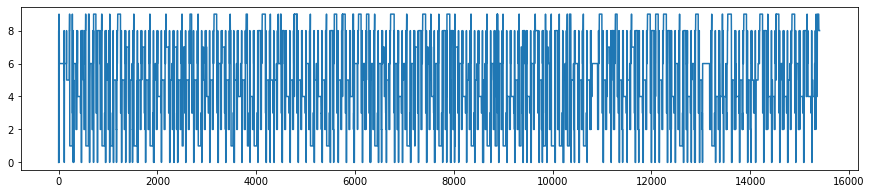

In [4]:
Pdataset = pandas.read_csv('mrecout.csv', usecols=[1], engine='python', skipfooter=3)
plt.figure(figsize=(15,3))
plt.plot(Pdataset)
plt.show()

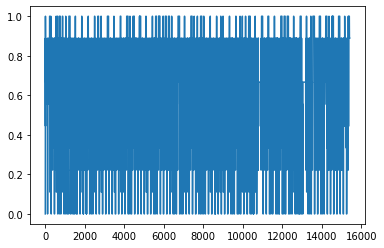

In [5]:
Pdataset.tail(14)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Pdataset)
plt.plot(dataset)
plt.show()

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

10320 5084


In [7]:
# reshape into X=t and Y=t+1
look_back = 120
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(10199, 120)

In [8]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(10199, 1, 120)

In [9]:
#inut = Input(shape=(look_back,), name="input")
#act="relu"
#h = Dense(100, activation=act, name="encoder_1" )(inut)
#conv0= Conv2D(32, 5, strides=(1,2), padding='same', activation='relu', name='conv0')(inut)
#conv1= Conv2D(32, 5, strides=(2,4), padding='same', activation='relu', name='conv1')
#conv2= Conv2D(32, 3, strides=2, padding=pad3, activation='relu', name='conv2')
  

In [10]:
  """     
  #model.add(Conv1D(64, 3, activation='relu', input_shape=(2,seq_length)))

  y = tf.keras.layers.Conv2D(filters=32,
                             kernel_size=5,
                             padding='same',
                             activation='relu')(inut)
  y = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                   strides=(2, 2),
                                   padding='same')(y)
  y = tf.keras.layers.Conv2D(filters=32,
                             kernel_size=5,
                             padding='same',
                             activation='relu')(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                   strides=(2, 2),
                                   padding='same')(y)
  y = tf.keras.layers.Flatten()(y)
  y = tf.keras.layers.Dense(1024, activation='relu')(y)
  y = tf.keras.layers.Dropout(0.4)(y)

  probs = tf.keras.layers.Dense(10, activation='softmax')(y)
  """
trainY.shape  

(10199,)

In [11]:
seq_length = look_back
n_classes=10
model = Sequential()
model.add(Conv1D(128, 1, activation='relu', input_shape=(1,seq_length)))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(128, 1, activation='relu'))
model.add(Conv1D(128, 1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))


In [12]:

trainYO = to_categorical(trainY, num_classes=n_classes)
testYO = to_categorical(testY, num_classes=n_classes)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [13]:
model.fit(trainX, trainYO, batch_size=512, epochs=300 )


W0425 15:42:23.388230 140108565497664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 10199 samples
Epoch 1/300
10199/10199 [==============================] - 1s 131us/sample - loss: 0.1921 - accuracy: 0.9465
Epoch 2/300
10199/10199 [==============================] - 0s 9us/sample - loss: 0.0781 - accuracy: 0.9790
Epoch 3/300
10199/10199 [==============================] - 0s 11us/sample - loss: 0.0593 - accuracy: 0.9807
Epoch 4/300
10199/10199 [==============================] - 0s 11us/sample - loss: 0.0476 - accuracy: 0.9827
Epoch 5/300
10199/10199 [==============================] - 0s 12us/sample - loss: 0.0402 - accuracy: 0.9846
Epoch 6/300
10199/10199 [==============================] - 0s 12us/sample - loss: 0.0364 - accuracy: 0.9857
Epoch 7/300
10199/10199 [==============================] - 0s 12us/sample - loss: 0.0342 - accuracy: 0.9861
Epoch 8/300
10199/10199 [==============================] - 0s 12us/sample - loss: 0.0309 - accuracy: 0.9881
Epoch 9/300
10199/10199 [==============================] - 0s 12us/sample - loss: 0.0293 - accuracy: 0.9887
Epoch

10199/10199 [==============================] - 0s 19us/sample - loss: 0.0111 - accuracy: 0.9969
Epoch 77/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0040 - accuracy: 0.9988
Epoch 78/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0060 - accuracy: 0.9978
Epoch 79/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0084 - accuracy: 0.9967
Epoch 80/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0060 - accuracy: 0.9979
Epoch 81/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0068 - accuracy: 0.9977
Epoch 82/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0081 - accuracy: 0.9973
Epoch 83/300
10199/10199 [==============================] - 0s 20us/sample - loss: 0.0067 - accuracy: 0.9977
Epoch 84/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0066 - accuracy: 0.9976
Epoch 85/300
10199/10199 [======

10199/10199 [==============================] - 0s 19us/sample - loss: 0.0016 - accuracy: 0.9995
Epoch 151/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0040 - accuracy: 0.9986
Epoch 152/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0060 - accuracy: 0.9980
Epoch 153/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0015 - accuracy: 0.9995
Epoch 154/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0064 - accuracy: 0.9984
Epoch 155/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0021 - accuracy: 0.9992
Epoch 156/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0060 - accuracy: 0.9979
Epoch 157/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0056 - accuracy: 0.9981
Epoch 158/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0019 - accuracy: 0.9993
Epoch 159/300
10199/1019

10199/10199 [==============================] - 0s 19us/sample - loss: 0.0074 - accuracy: 0.9985
Epoch 225/300
10199/10199 [==============================] - 0s 19us/sample - loss: 9.7653e-04 - accuracy: 0.9996
Epoch 226/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0041 - accuracy: 0.9986
Epoch 227/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0029 - accuracy: 0.9990
Epoch 228/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0026 - accuracy: 0.9992
Epoch 229/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0018 - accuracy: 0.9993
Epoch 230/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0028 - accuracy: 0.9990
Epoch 231/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0054 - accuracy: 0.9986
Epoch 232/300
10199/10199 [==============================] - 0s 19us/sample - loss: 0.0015 - accuracy: 0.9996
Epoch 233/300
10199/

10199/10199 [==============================] - 0s 10us/sample - loss: 0.0014 - accuracy: 0.9994
Epoch 298/300
10199/10199 [==============================] - 0s 11us/sample - loss: 0.0032 - accuracy: 0.9988
Epoch 299/300
10199/10199 [==============================] - 0s 10us/sample - loss: 7.5967e-04 - accuracy: 0.9998
Epoch 300/300
10199/10199 [==============================] - 0s 11us/sample - loss: 0.0036 - accuracy: 0.9989


In [14]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


10199/10199 [==============================] - 1s 122us/sample - loss: 4.1136e-04 - accuracy: 0.9998
Test loss: 0.0004113645128661778
Test accuracy: 0.99984306


In [15]:
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
trainPredict1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
score1 = model.evaluate(testX, testYO, verbose=1)
print(score1)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

4963/4963 [==============================] - 1s 139us/sample - loss: 0.0285 - accuracy: 0.9946
[0.028471408121593895, 0.9946]
Test loss: 0.028471408121593895
Test accuracy: 0.9946
